# Description

Objective of this project is to <b> predict insurance charges </b>.

<b> Dataset url</b>: https://www.kaggle.com/datasets/awaiskaggler/insurance-csv

### Importing Libraries and Loadind Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv('insurance.csv')

### Performing EDA

In [20]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [7]:
print("No of rows in dataset:", df.shape[0])
print("No of columns in dataset:", df.shape[1])

No of rows in dataset: 1338
No of columns in dataset: 7


In [209]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [210]:
# finding out if dataset contains an null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Describe method

Gives summary of each numerical column

In [8]:
# statistical Summary
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## Numerical Features

In [10]:
[features for features in df.dtypes[df.dtypes !='object'].index]

['age', 'bmi', 'children', 'expenses']

In [11]:
num_features = df.dtypes[df.dtypes !=object].index

In [18]:
cat_features, print("No of Numerical features: ",len(num_features))

No of Numerical features:  4


(Index(['sex', 'smoker', 'region'], dtype='object'), None)

In [14]:
# summarize numerical features
df[num_features].describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## Categorical Features 

In [17]:
cat_features = df.dtypes[df.dtypes=='object'].index
cat_features, print("No of categorical features: ",len(cat_features))

No of categorical features:  3


(Index(['sex', 'smoker', 'region'], dtype='object'), None)

In [19]:
# summarize categorical features
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Unique values in categorical variables 

In [23]:
#count number of labels in sex variable 
print(df.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [30]:
#count number of labels in smoker variable 
print(df["smoker"].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [29]:
for i in cat_features:
    print(i,":", df[i].unique())

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


In [31]:
#print number of labels in 'region'  variable 
print(df["region"].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


## Data Cleaning:
      

In [32]:
# check shape before drop duplicates 
df.shape

(1338, 7)

In [33]:
#Dropping duplicate rows
df = df.drop_duplicates()

In [36]:
# check shape after dropping duplicates
df.shape

(1337, 7)

There is a difference of 1 row in previous and current dataset, i.e (Only one row duplicated)

## Check NULL Values

In [35]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## Visulaizing Dataset

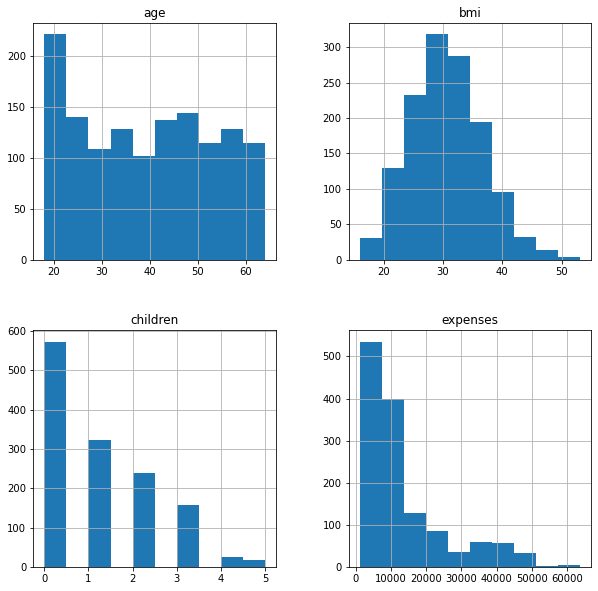

In [37]:
# Histogram of each feature 

df.hist(bins=10,figsize=(10,10))
plt.show()

# Scatter plot 

Scatter Plots are used for Biavariate analysis

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='expenses', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='expenses', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='expenses', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='expenses'>,
        <AxesSubplot:xlabel='bmi', ylabel='expenses'>,
        <AxesSubplot:xlabel='children', ylabel='expenses'>,
        <AxesSubplot:xlabel='expenses', ylabel='expenses'>]], dtype=object)

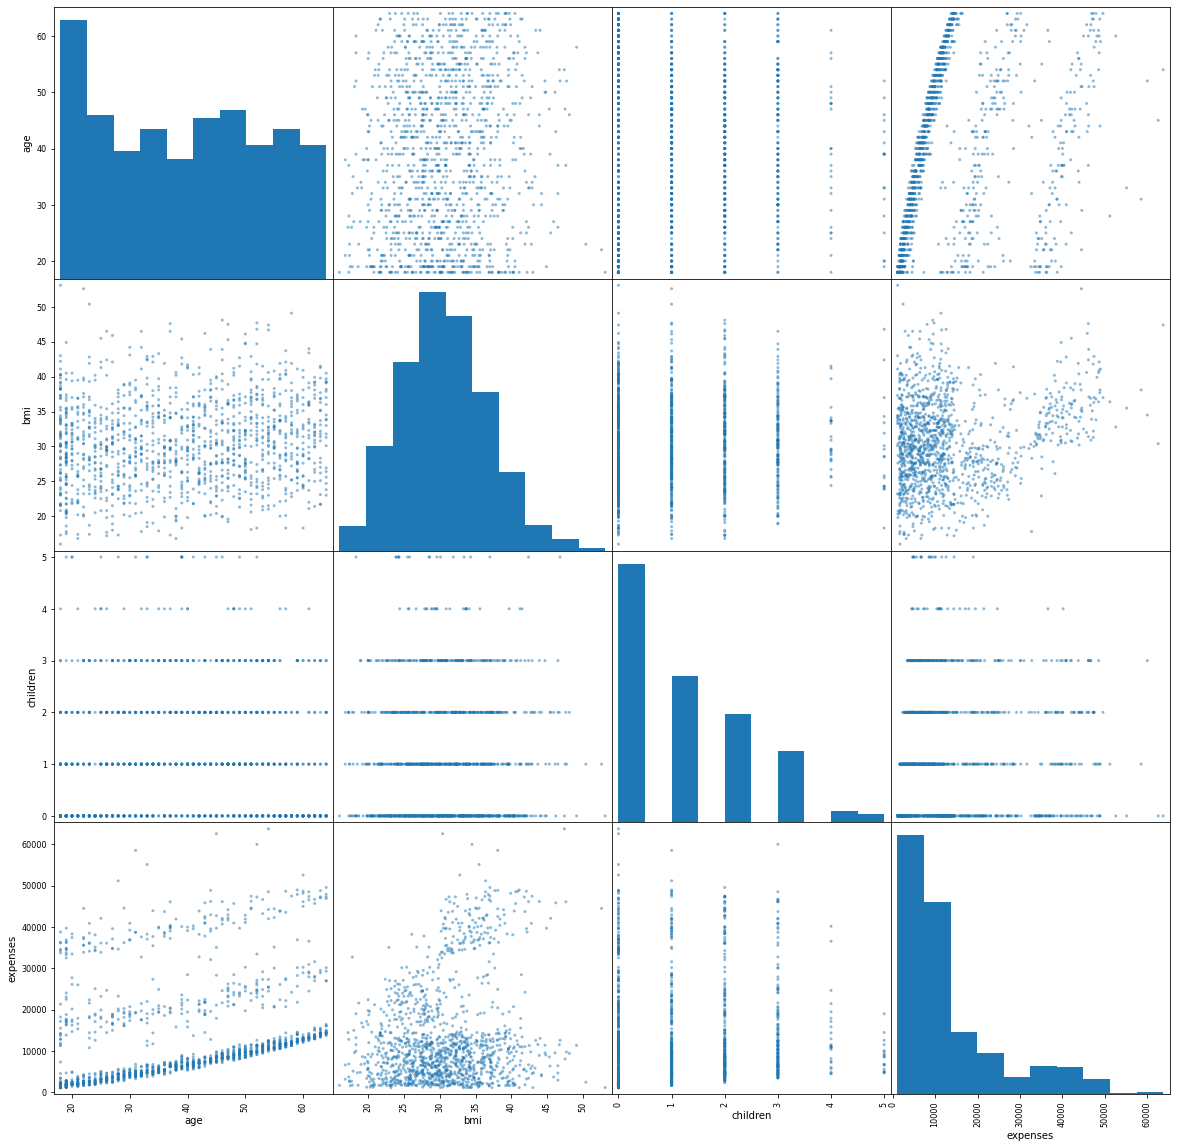

In [38]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(20,20))

## Feature Engineering:

### Converting Categorical Variable to Numerical variable 

In [40]:
dummies = pd.get_dummies(df.sex)

In [41]:
dummies.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [42]:
merge = pd.concat([df,dummies],axis=1)
merge.head()

,age,sex,bmi,children,smoker,region,expenses,female,male
0,19,female,27.9,0,yes,southwest,16884.92,1,0
1,18,male,33.8,1,no,southeast,1725.55,0,1
2,28,male,33.0,3,no,southeast,4449.46,0,1
3,33,male,22.7,0,no,northwest,21984.47,0,1
4,32,male,28.9,0,no,northwest,3866.86,0,1


In [43]:
df1 = merge.drop(['sex','female'],axis=1)
df1.head()

,age,bmi,children,smoker,region,expenses,male
0,19,27.9,0,yes,southwest,16884.92,0
1,18,33.8,1,no,southeast,1725.55,1
2,28,33.0,3,no,southeast,4449.46,1
3,33,22.7,0,no,northwest,21984.47,1
4,32,28.9,0,no,northwest,3866.86,1


In [44]:
dumi1 = pd.get_dummies(df1.smoker)
dumi1.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [45]:
merge1 = pd.concat([df1,dumi1],axis=1)
df2 = merge1.drop(['smoker','no'],axis=1)
df2.head()

,age,bmi,children,region,expenses,male,yes
0,19,27.9,0,southwest,16884.92,0,1
1,18,33.8,1,southeast,1725.55,1,0
2,28,33.0,3,southeast,4449.46,1,0
3,33,22.7,0,northwest,21984.47,1,0
4,32,28.9,0,northwest,3866.86,1,0


In [46]:
dummi2=pd.get_dummies(df2.region)
dummi2.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [47]:
merge2 = pd.concat([df2,dummi2],axis=1)
merge2.head()

,age,bmi,children,region,expenses,male,yes,northeast,northwest,southeast,southwest
0,19,27.9,0,southwest,16884.92,0,1,0,0,0,1
1,18,33.8,1,southeast,1725.55,1,0,0,0,1,0
2,28,33.0,3,southeast,4449.46,1,0,0,0,1,0
3,33,22.7,0,northwest,21984.47,1,0,0,1,0,0
4,32,28.9,0,northwest,3866.86,1,0,0,1,0,0


In [48]:
df3 = merge2.drop(['region','northeast'],axis=1)
df3.head()

,age,bmi,children,expenses,male,yes,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [49]:
df3.shape

(1337, 9)

### Let's saperate target feature

In [51]:
target_name = 'expenses'
y = df3[target_name]
# Seperate object Input  feature 
X= df3.drop(target_name,axis=1)

In [52]:
X.shape

(1337, 8)

In [53]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

## Train-Test Split

We will use sklearn library to perform Machiene learning algorithms

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [56]:
X_train.shape,y_train.shape

((1069, 8), (1069,))

In [57]:
X_test.shape,y_test.shape

((268, 8), (268,))

## Building Linear Regression Algorithm

In [58]:
from sklearn.linear_model import LinearRegression
# Creating an Object 
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

### Evaluation Metrics

In [59]:
train_score = lr.score(X_train,y_train)
print('Train_score',train_score)

Train_score 0.7529469407973212


In [60]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

print("r_2 Score",score)

r_2 Score 0.7405436314738476


In [61]:
from sklearn import metrics

print("Mean Absolute  Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute  Error 4393.838937013879
Mean Squared Error 41911806.98078472
Root Mean Square Error 66.28603877902103


In [63]:
df4 = pd.DataFrame({'Actual':y_test,'predicted':y_pred,'variance':y_test-y_pred})
df4.head(10)

,Actual,predicted,variance
13,11090.72,14428.920783,-3338.200783
1052,9288.03,11290.895725,-2002.865725
172,1694.80,-1768.263286,3463.063286
395,7526.71,5781.158123,1745.551877
934,4673.39,8475.161731,-3801.771731
751,1906.36,2511.819820,-605.459820
99,15820.70,27026.814250,-11206.114250
779,9869.81,10599.598633,-729.788633
108,2867.12,3516.087368,-648.967368
1103,11363.28,13647.725863,-2284.445863


In [66]:
lr.predict([[56,39.8,0,0,0,0,1,0]])

/Users/pavansaish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14428.92078333])

In [261]:
print("Intercept",lr.intercept_)

Intercept -11706.11877378776


In [262]:
print("coeffiecients",lr.coef_)

coeffiecients [  253.79928425   337.98283552   527.21806988   -38.25699752
 23727.96144273  -875.09160778 -1529.43721458 -1124.21294814]


## Feature Selection

Using Feature Selection method: I. Helps in faster training time. II. Improves performance and Accuracy
III. Reduce Bias-Variance issues (Over.Fitting)

## There are many kinds of feature selection methods

            1) Forward Selection

            2) Recursive Faeture Elimination 

            3) Backward Elimination
            
Backward Elimination Method is widely used and let's use it

## Backward Elimination Method Procedure


### Step 1: 
First Step in  backward elimination is select a significance level or Select P-value.

Usually in most cases 5% Significance level is selected. That means  P-value will be 0.5 you can change this value depends on the project


### Step 2:

Second Step is <b> Fit your machine learning model with all features selected </b>


### Step 3

In Step 3, Identify feature which has highest P-value


### Step 4

Main Step

- if P-Value is greater than significance level - we selected and remove this feature from our dataset
- if P-valie is less than Significance Level  we just jump to Step 6 which means that we are done

### Step 5

Once we find out feature  which has to be removd from our dataset  we will fir the model again  with new dataset After fitting a model with new dataset  we will jump back to step 3:

This Process will continue untill we reach a point  in step 4 where  highest P-Value  from all remaining features  in datset is  less than significance level selected step 1: 


In our Example this means iterate  from step 3 to Step 5 and back till  highest P-Value  in dataset is less than 0.05
Out of 50 asssumed features   we might filter out  good 10 features

### Step 6

Once We reach Step 6 We are done  with Feature Selection process we have Sucessfully used Backward Elimination Method

In [67]:
import statsmodels.api as sm

In [68]:
X.head()

,age,bmi,children,male,yes,northwest,southeast,southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [266]:
X.shape

(1337, 8)

Before We begin with Backward Elimination  we need  to append '1'  at begining of our datset now Why is Important ?

Equation of line is y = b +m1x1 ;m2x2 +m3x3 +m4x4

When we make  a linear model with sklearn , the <b> bias term is seperately calculated
    
    
- However to perform Backward elimination  we have to use linear model provided  by statsmodel library  - Which doesnot consider bias term 
    
- Hence by adding  a dummy feature with value as '1'  our equation comes out to be  like this :
    
    y = b*X0 + m1x1 + m2x2 +m3x3 + m4x4 where x0 =1  

In [267]:
# adding a column of ones  as integer datatype

# X1 = (1337,1)  + (1337,9)

# Constant that is X1

X1 = np.append(arr = np.ones((1337,1)).astype(int),values=X,axis=1)

In [268]:
X.head()

,age,bmi,children,male,yes,northwest,southeast,southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [269]:
X1.shape

(1337, 9)

In [270]:
X1

array([[ 1. , 19. , 27.9, ...,  0. ,  0. ,  1. ],
       [ 1. , 18. , 33.8, ...,  0. ,  1. ,  0. ],
       [ 1. , 28. , 33. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 1. , 18. , 36.9, ...,  0. ,  1. ,  0. ],
       [ 1. , 21. , 25.8, ...,  0. ,  0. ,  1. ],
       [ 1. , 61. , 29.1, ...,  1. ,  0. ,  0. ]])

In [275]:
# choose significance level  usually 0.05% if p>0.05
# for highest values parameter remove that value

X_opt = X1[:,[0,1,2,3,4,5,6,7,8]]
X_opt.shape

(1337, 9)

In [276]:
X.head()

,age,bmi,children,male,yes,northwest,southeast,southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [277]:
X_opt

array([[ 1. , 19. , 27.9, ...,  0. ,  0. ,  1. ],
       [ 1. , 18. , 33.8, ...,  0. ,  1. ,  0. ],
       [ 1. , 28. , 33. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 1. , 18. , 36.9, ...,  0. ,  1. ,  0. ],
       [ 1. , 21. , 25.8, ...,  0. ,  0. ,  1. ],
       [ 1. , 61. , 29.1, ...,  1. ,  0. ,  0. ]])

In [278]:
# Constant with 0th column
X_opt[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

In [280]:
# 'age' 1st column

X_opt[:,1]

array([19., 18., 28., ..., 18., 21., 61.])

In [281]:
# 'bmi' 2nd column

X_opt[:,2]

array([27.9, 33.8, 33. , ..., 36.9, 25.8, 29.1])

In [282]:
# 'children' 3rd column

X_opt[:,3]

array([0., 1., 3., ..., 0., 0., 0.])

In [283]:
# 'male' 4th column

X_opt[:,4]

array([0., 1., 1., ..., 0., 0., 0.])

In [284]:
# 'yes' 5th column

X_opt[:,5]

array([1., 0., 0., ..., 0., 0., 1.])

In [285]:
# 'north west' 6th column

X_opt[:,6]

array([0., 0., 0., ..., 0., 0., 1.])

In [286]:
# 'north East' 7th column

X_opt[:,7]

array([0., 1., 1., ..., 1., 0., 0.])

In [288]:
# 'SouthWest' 8th column

X_opt[:,8]

array([1., 0., 0., ..., 0., 1., 0.])

## OLS stands for 'Ordinary Least Squares' which essentially  train an linear model

In [289]:
ols = sm.OLS(endog=y,exog=X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:16:30   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.194e+04    988.219    -12.082      0.000   -1.39e+04      -1e+04
x1           256.7472     11.912     21.554      0.000     233.379     280.116
x2           339.3472     28.610     11.861      0.000     283.221     395.473
x3           475.0071    137.892      3.445      0.001     204.496     745.518
x4          -129.5144    333.185     -0.389      0.698    -783.140     524.111
x5          2.385e+04    413.334     57.693      0.000     2.3e+04    2.47e+04
x6          -349.0429    476.809     -0.732      0.464   -1284.424     586.338
x7         -1035.8409    478.855     -2.163      0.031   -1975.236     -96.445
x8          -959.3365    478.085     -2.007      0.045   -1897.220     -21.453
==============================================================================
Omnibus:                      299.949   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.046
Skew:                           1.211   Prob(JB):                    1.97e-156
Kurtosis:                       5.647   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation !!
From the Summary, We Observe  that highest P-Value is for 4th Feature (Male) is 0.698 , which is way over Significance level  of 0.05 Hence we will remove  'male'
Feature


## Removing  the variable X4


In [290]:
# Remove 4th Column (X4=Male) from  x1 is its highest p-value  is 0.698
# Build OLS  with remaining features  and check most significance value 

X_opt1 = X1[:,[0,1,2,3,5,6,7,8]]
X_opt1.shape

(1337, 8)

In [291]:
ols = sm.OLS(endog=y,exog=X_opt1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     571.8
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:18:32   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1329   BIC:                         2.713e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.199e+04    979.201    -12.245      0.000   -1.39e+04   -1.01e+04
x1           256.8577     11.905     21.576      0.000     233.504     280.212
x2           338.8292     28.570     11.860      0.000     282.782     394.876
x3           474.0489    137.826      3.439      0.001     203.668     744.430
x4          2.383e+04    412.024     57.846      0.000     2.3e+04    2.46e+04
x5          -348.0678    476.650     -0.730      0.465   -1283.136     587.001
x6         -1035.2019    478.700     -2.163      0.031   -1974.291     -96.113
x7          -958.6730    477.929     -2.006      0.045   -1896.251     -21.095
==============================================================================
Omnibus:                      300.308   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.636
Skew:                           1.212   Prob(JB):                    8.92e-157
Kurtosis:                       5.650   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation !!

we observe highest p-value  is for 6th Feature  of X1or X5 of X_opt1(NorthWest) is 0.465 which is way over significance level of 0.05. So we remove it

In [292]:
# Remove 6th column (male)  from x1 as it is highest p-value  is 0.465
# Build OLS with Remaining Features  and check most significance value 


reg_opt2 = X1[:,[0,1,2,3,5,7,8]]
reg_opt2.shape

(1337, 7)

In [293]:
ols = sm.OLS(endog=y,exog=reg_opt2).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     667.3
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:19:38   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.216e+04    950.141    -12.801      0.000    -1.4e+04   -1.03e+04
x1           256.8764     11.903     21.581      0.000     233.526     280.226
x2           338.8163     28.565     11.861      0.000     282.779     394.854
x3           470.9691    137.738      3.419      0.001     200.762     741.176
x4          2.384e+04    411.830     57.892      0.000     2.3e+04    2.46e+04
x5          -861.6781    415.483     -2.074      0.038   -1676.752     -46.604
x6          -784.3870    413.996     -1.895      0.058   -1596.543      27.769
==============================================================================
Omnibus:                      299.697   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.733
Skew:                           1.211   Prob(JB):                    6.28e-156
Kurtosis:                       5.639   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
# we observe highest p-value is for 8th Feature of X1or X6 of X_opt2(Southwest) is 0.058 which is greater than 0.05. So we remove it


X_opt3 = X1[:,[0,1,2,3,5,7]]
X_opt3.shape

(1337, 6)

In [295]:
ols = sm.OLS(endog=y,exog=X_opt3).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.4
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:20:18   Log-Likelihood:                -13540.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1331   BIC:                         2.712e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.227e+04    949.234    -12.931      0.000   -1.41e+04   -1.04e+04
x1           257.0274     11.914     21.574      0.000     233.655     280.400
x2           333.6058     28.460     11.722      0.000     277.775     389.437
x3           467.6244    137.860      3.392      0.001     197.177     738.071
x4          2.385e+04    412.194     57.866      0.000     2.3e+04    2.47e+04
x5          -581.1883    388.592     -1.496      0.135   -1343.507     181.130
==============================================================================
Omnibus:                      302.495   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.089
Skew:                           1.220   Prob(JB):                    3.54e-158
Kurtosis:                       5.658   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
# from observation 

# we observe highest p-value  is for 7th Feature  of X1or X5 of X_opt3(SouthEast) is 0.138 which is way over significance level  of 0.05 Hence we remove it
X_opt4 = X1[:,[0,1,2,3,5]]
X_opt4.shape


(1337, 5)

In [299]:
ols = sm.OLS(endog=y,exog=X_opt4).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.6
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:21:38   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    942.599    -12.838      0.000    -1.4e+04   -1.03e+04
x1           257.7568     11.910     21.643      0.000     234.393     281.120
x2           321.9583     27.386     11.756      0.000     268.233     375.683
x3           473.1638    137.874      3.432      0.001     202.689     743.639
x4          2.381e+04    411.402     57.874      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.074   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.378
Skew:                           1.215   Prob(JB):                    3.73e-157
Kurtosis:                       5.651   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
X_opt4

array([[ 1. , 19. , 27.9,  0. ,  1. ],
       [ 1. , 18. , 33.8,  1. ,  0. ],
       [ 1. , 28. , 33. ,  3. ,  0. ],
       ...,
       [ 1. , 18. , 36.9,  0. ,  0. ],
       [ 1. , 21. , 25.8,  0. ,  0. ],
       [ 1. , 61. , 29.1,  0. ,  1. ]])

In [301]:
X_train,X_test,y_train,y_test = train_test_split(X_opt4,y,test_size=0.2,random_state=0)
new_model = LinearRegression()
new_model.fit(X_train,y_train)

LinearRegression()

In [302]:
new_pred = new_model.predict(X_test)

In [303]:
# train Score After applying Backward Elimination Method
train1_score = new_model.score(X_train,y_train)
print("Train_score",train1_score)

Train_score 0.7475161330538833


In [304]:
score = r2_score(y_test,new_pred)
print("r_2_score",score)

r_2_score 0.7525425247622064


In [305]:
#  BEfore Backward Elimination  r_2 score : 0.74
# After Apllying  Backward Elimination : 0.75


print("Mean Absolute  Error",metrics.mean_absolute_error(y_test,new_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,new_pred))
print("Root Mean Square Error",np.sqrt(metrics.mean_absolute_error(y_test,new_pred)))

Mean Absolute  Error 4391.290382885985
Mean Squared Error 41629663.85917102
Root Mean Square Error 66.26681207728335


In [306]:
new_df = pd.DataFrame({'Actual':y_test,'predicted':new_pred,'variance':y_test-new_pred})
new_df.head()

,Actual,predicted,variance
1248,1633.96,5217.560992,-3583.600992
610,8547.69,9722.472057,-1174.782057
393,9290.14,10807.157449,-1517.017449
503,32548.34,26408.035356,6140.304644
198,9644.25,6858.508550,2785.741450


In [307]:
X_opt4[198,:]

array([ 1. , 51. , 18.1,  0. ,  0. ])

In [308]:
new_model.predict([[1. , 51. , 18.1,  0. ,  0.]])

array([6858.50854979])

In [309]:
print("intercept",new_model.intercept_)

intercept -11023.376797378667


In [310]:
print("Coefficients",new_model.coef_)

Coefficients [    0.           245.15144532   297.1912506    486.30815668
 23768.63979903]


This process is one type of Feature selection techniques. We can use boosting methods to improve accuracy of the model.